# GRIP-The Sparks Foundation
 NAME: SHAIK FARHAN


## Task-1 : Prediction using Supervised ML
 Description: Predict the percentage of a student based on the no.of study hours. This is a simple linear regression task involving 2 variables. We use python programming language to predicted score if a student studies for 9.25 hrs/ day.

### Importing libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the dataset
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
df.shape

(25, 2)

In [3]:
# Finding the datatypes of the columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
#Columns present in dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
# Some basic stats of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing the dataset

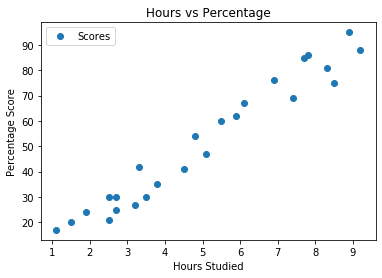

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

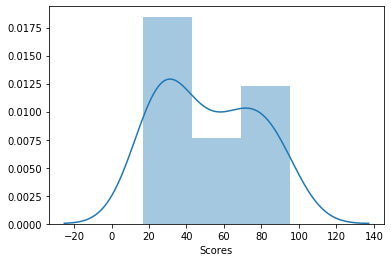

In [10]:
sns.distplot(df.Scores, norm_hist=True)
#This graph depicts a normal distribution 

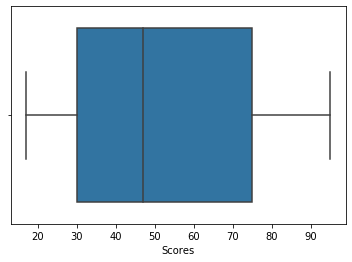

In [11]:
sns.boxplot(df.Scores)
#This graph depicts that no outliers are present

### Machine learning Application

In [12]:
#Splitting the dataset
#The first step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = df.Hours.values
X=X.reshape(-1, 1)
y = df.Scores
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)
(25, 1)


For Training the Algorithm
We have splitted our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
#Applying Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

m=model.coef_
c=model.intercept_
print(f"Coefficient is {m} and intercept is {c}")

Coefficient is [9.91065648] and intercept is 2.018160041434683


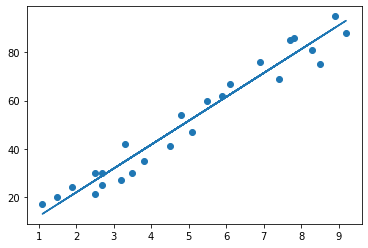

In [14]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:

# Comparision
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
#Evaluating the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics  

print('RMSE score:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

RMSE score: 21.5987693072174
R2 score: 0.9454906892105356
Mean Absolute Error: 4.183859899002975


In [18]:
# Final Step
print(f"The predicted score for a student who studies for 9.25 hours/day is {model.predict([[9.25]])}")

The predicted score for a student who studies for 9.25 hours/day is [93.69173249]
